# EE 379K: Lab 8

## Rohan Nagar and Wenyang Fu

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import (cross_val_score, train_test_split,
                                    GridSearchCV, RandomizedSearchCV)
from sklearn.preprocessing import Imputer

%load_ext autoreload
%autoreload 2

/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [37]:
def to_file(filename, preds):
    with open(filename, 'w') as f:
        f.write('Id,Probability\n')
        for num, pred in zip(range(1,101504), preds):
            f.write('{},{}\n'.format(num, pred))

# Question 1

Some of the features we gave you are pure noise. Which ones? Find them and remove them.

## F1, F6-9, F11-13, F16-18


In [3]:
def show_feature_dist(df):
    """ Plot the distribution for each feature. """
    fig = plt.figure(figsize=(20, 15))
    cols = 5
    rows = np.ceil(float(df.shape[1]) / cols)
    for i, col in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(col)
        if df.dtypes[col] == np.object:
            df[column].value_counts().plot(
                kind="bar", axes=ax)
        else:
            df[col].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.show()

In [4]:
train = pd.read_csv('data/train_final.csv')
test = pd.read_csv('data/test_final.csv')

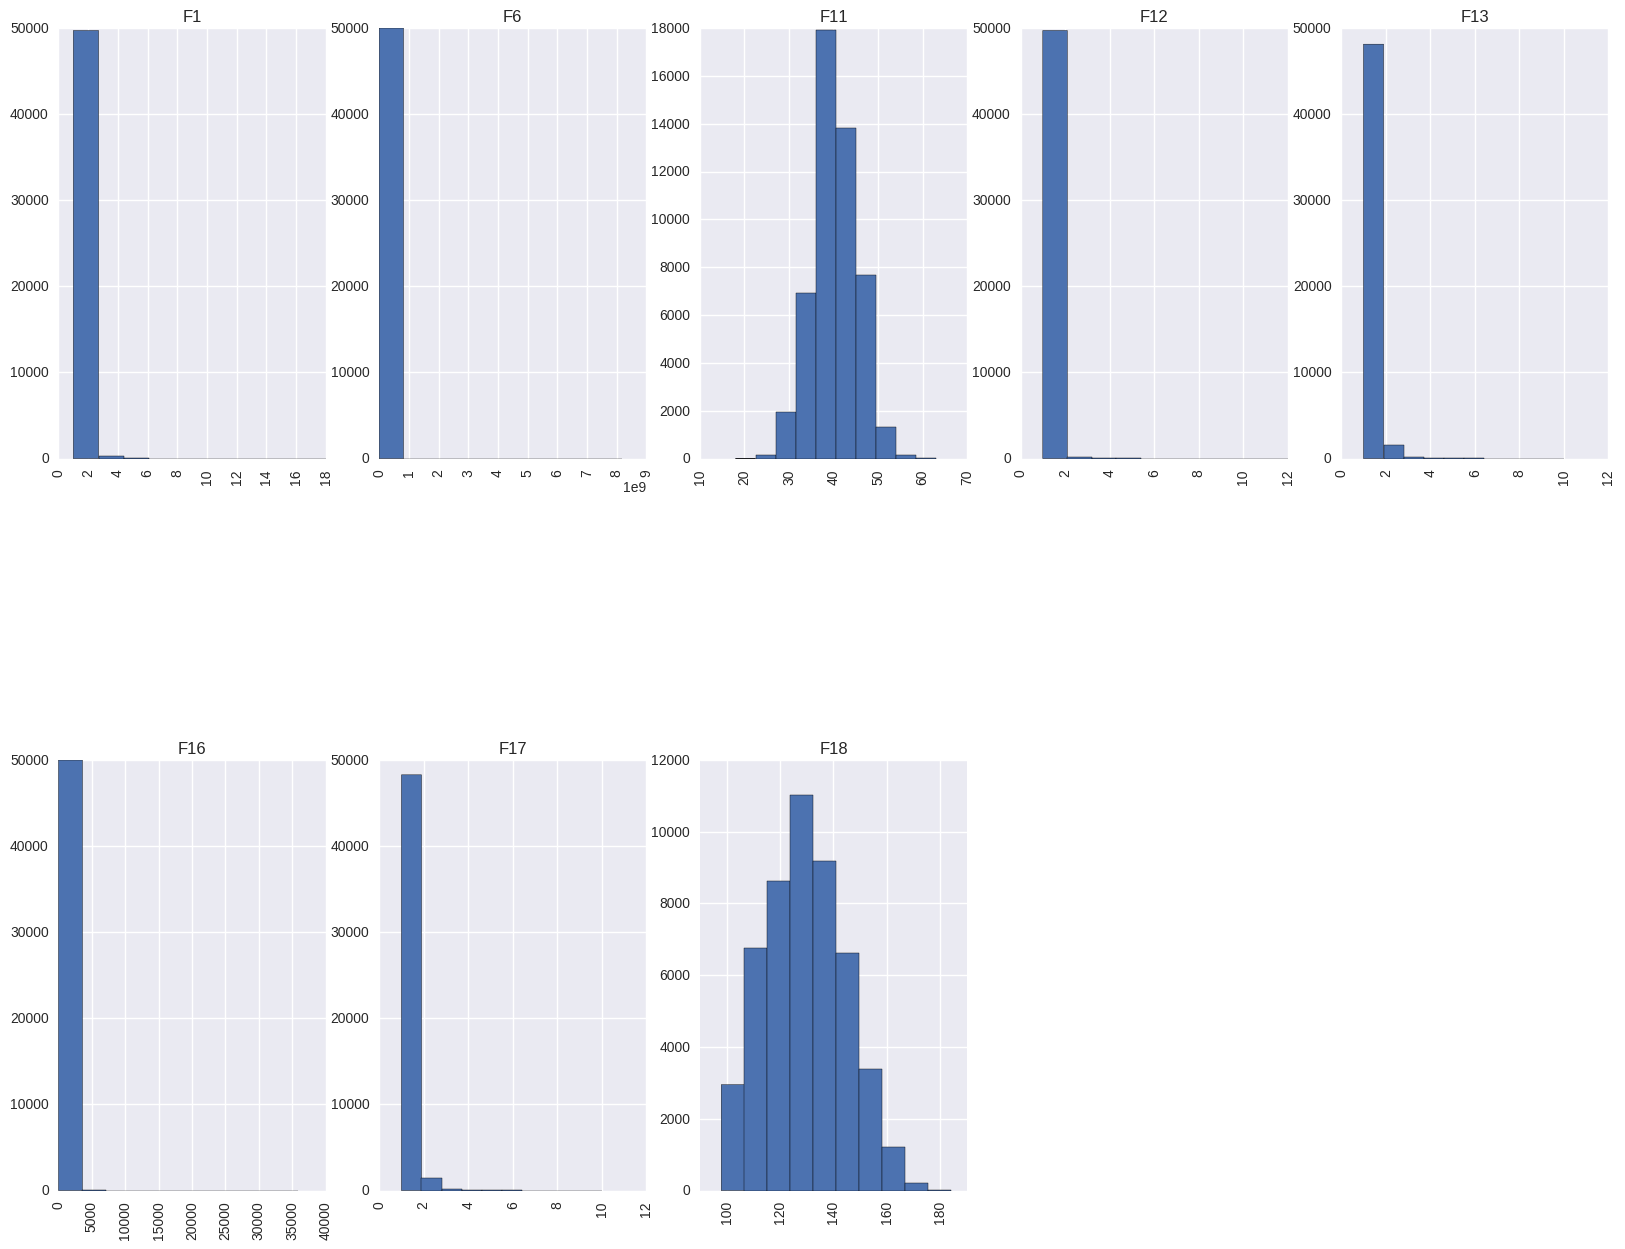

In [6]:
train_noisy = train.ix[:, ['F1', 'F6', 'F11', 'F12', 'F13', 'F16', 'F17', 'F18']]
show_feature_dist(train_noisy)

In [16]:
def get_unique_values(df, feat):
    """Given a dataframe and feature name, 
       display all unique values of a particular feature. """
    feat, uniques = feat, sorted(df.ix[:, feat].unique())
    print('{}: {}'.format(feat, uniques))
    return feat, uniques

_, f2_uniques = get_unique_values(train, 'F2')

F2: [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 96, 98]


In [21]:
# Help from: http://stackoverflow.com/questions/13129618/histogram-values-of-a-pandas-series

import numpy as np

bins=f2_uniques
count, division = np.histogram(train.ix[:, 'F2'], bins=bins)
print(count)

[47470  1905   379   104    32     9     6     1     1     1    90]


# Question 2

Some of the features are noisy versions of other features. Which ones? Find them and remove them.

In [22]:
_, f1_uniques = get_unique_values(train, 'F1')
print(f1_uniques)
count, division = np.histogram(train.ix[:, 'F1'], bins=f1_uniques)
print(count)

F1: [1, 2, 3, 4, 5, 6, 8, 12, 18]
[1, 2, 3, 4, 5, 6, 8, 12, 18]
[48227  1484   218    43    15     8     1     2]


# Question 3

Retrain your models using this information. Merge models with your lab partner and report your best private score. Does removing the noise features improve your performance?

# Question 4

Write a post on the inclass Kaggle forums that contains some cool data science. Include your post in your report. Your post can be written by two people like your lab report.

# Question 5

Have a look here: 

https://www.kaggle.com/c/GiveMeSomeCredit

What is the best private score you can get for this competition? Include a screenshot of your submissions with scores in your lab report.

In [38]:
cs_train = pd.read_csv('cs-training.csv', index_col=0)
cs_test = pd.read_csv('cs-test.csv', index_col=0)

In [39]:
# Drop dependent variable in test
cs_test = cs_test.drop(['SeriousDlqin2yrs'], axis=1)

In [40]:
# Fill missing with mean
cs_train = cs_train.fillna(cs_train.mean())
cs_test = cs_test.fillna(cs_train.mean())

In [41]:
# Seperate dependent and independent
X_train = cs_train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = cs_train['SeriousDlqin2yrs']

In [42]:
from sklearn.preprocessing import FunctionTransformer

# Perform a log transform on the data
transformer = FunctionTransformer(np.log1p)
X_train = transformer.transform(X_train)
cs_test = transformer.transform(cs_test)

In [ ]:
import xgboost as xgb

# XGB
xg = xgb.XGBClassifier(max_depth=8, learning_rate=0.3, n_estimators=155, min_child_weight=0.6, subsample=1.0, colsample_bytree=0.45)
xg.fit(X_train, y_train)
preds = xg.predict_proba(cs_test)[:, 1]
to_file('submissions/q5/xgb.csv', preds)